# Holiday Package Prediciton
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* "Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. 
* One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. 
* The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. 
* However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

# Objective:

The objective is to build a model to predict the potential customer who is going to purchase the newly introduced travel package and which segment of customers should be targeted more.

### Import Data and Required Packages

In [1]:
# **Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv(r"./data/Travel.csv")

**Show Top 5 Records**

In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


* prodTaken- It means the product is taken by customer or not
* doration of Pitch -The call duration 

**Shape of the dataset**

In [10]:
df.shape

(4888, 20)

**Summary of the dataset**

In [12]:
# Display summary statistics for a dataframe
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


* Average age of the customer is 38 yrs
* Count is less in some column because of missing values.

**Check Datatypes in the dataset**

In [14]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* Most of the features are of numeric type.
* We need to change the datatype of some columns.
* 18 per cent conversion rate means 18 people done the booking as co pared the 100 people

Checking Null Values

In [6]:
df.isnull().mean()*100

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

* There are some missing values in the datstet.

## 3. EXPLORING DATA

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical features : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


### Feature Information
* **TypeofContact:** How customer was contacted (Company Invited or Self Inquiry)
* **CityTier:** City tier depends on the development of a city, population, facilities, and living standards.
* **DurationOfPitch:** Duration of the pitch by a salesperson to the customer
* **NumberOfFollowups:** Total number of follow-ups has been done by the salesperson after the sales pitch
* **ProductPitched:** Product pitched by the salesperson
* **Passport:** The customer has a passport or not (0: No, 1: Yes)
* **NumberOfTrips:** Average number of trips in a year by customer
* **PreferredPropertyStar:** Preferred hotel property rating by customer

In [25]:
# Number of unique elemts in each feature
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [27]:
# proportion of count data on categorical columns
for col in numeric_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

CustomerID
200000    0.020458
203256    0.020458
203263    0.020458
203262    0.020458
203261    0.020458
            ...   
201628    0.020458
201627    0.020458
201626    0.020458
201625    0.020458
204887    0.020458
Name: proportion, Length: 4888, dtype: float64
---------------------------
ProdTaken
0    81.178396
1    18.821604
Name: proportion, dtype: float64
---------------------------
Age
35.0    5.083655
36.0    4.954955
34.0    4.525955
31.0    4.354354
30.0    4.268554
32.0    4.225654
33.0    4.054054
37.0    3.968254
29.0    3.818104
38.0    3.775204
41.0    3.324753
39.0    3.217503
28.0    3.153153
40.0    3.131703
42.0    3.045903
27.0    2.960103
43.0    2.788503
46.0    2.595453
45.0    2.488202
26.0    2.273702
44.0    2.252252
51.0    1.930502
47.0    1.887602
50.0    1.844702
25.0    1.587302
52.0    1.458601
53.0    1.415701
48.0    1.394251
49.0    1.394251
55.0    1.372801
54.0    1.308451
56.0    1.244101
24.0    1.201201
22.0    0.986701
23.0    0.986701
59.0 

In [19]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

TypeofContact
Self Enquiry       70.820481
Company Invited    29.179519
Name: proportion, dtype: float64
---------------------------
Occupation
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: proportion, dtype: float64
---------------------------
Gender
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: proportion, dtype: float64
---------------------------
ProductPitched
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: proportion, dtype: float64
---------------------------
MaritalStatus
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: proportion, dtype: float64
---------------------------
Designation
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: proportion, dtype: fl

Type of Analysis are
* **Univariate Analysis:** The analysis of one variables.
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.



### Numerical Features

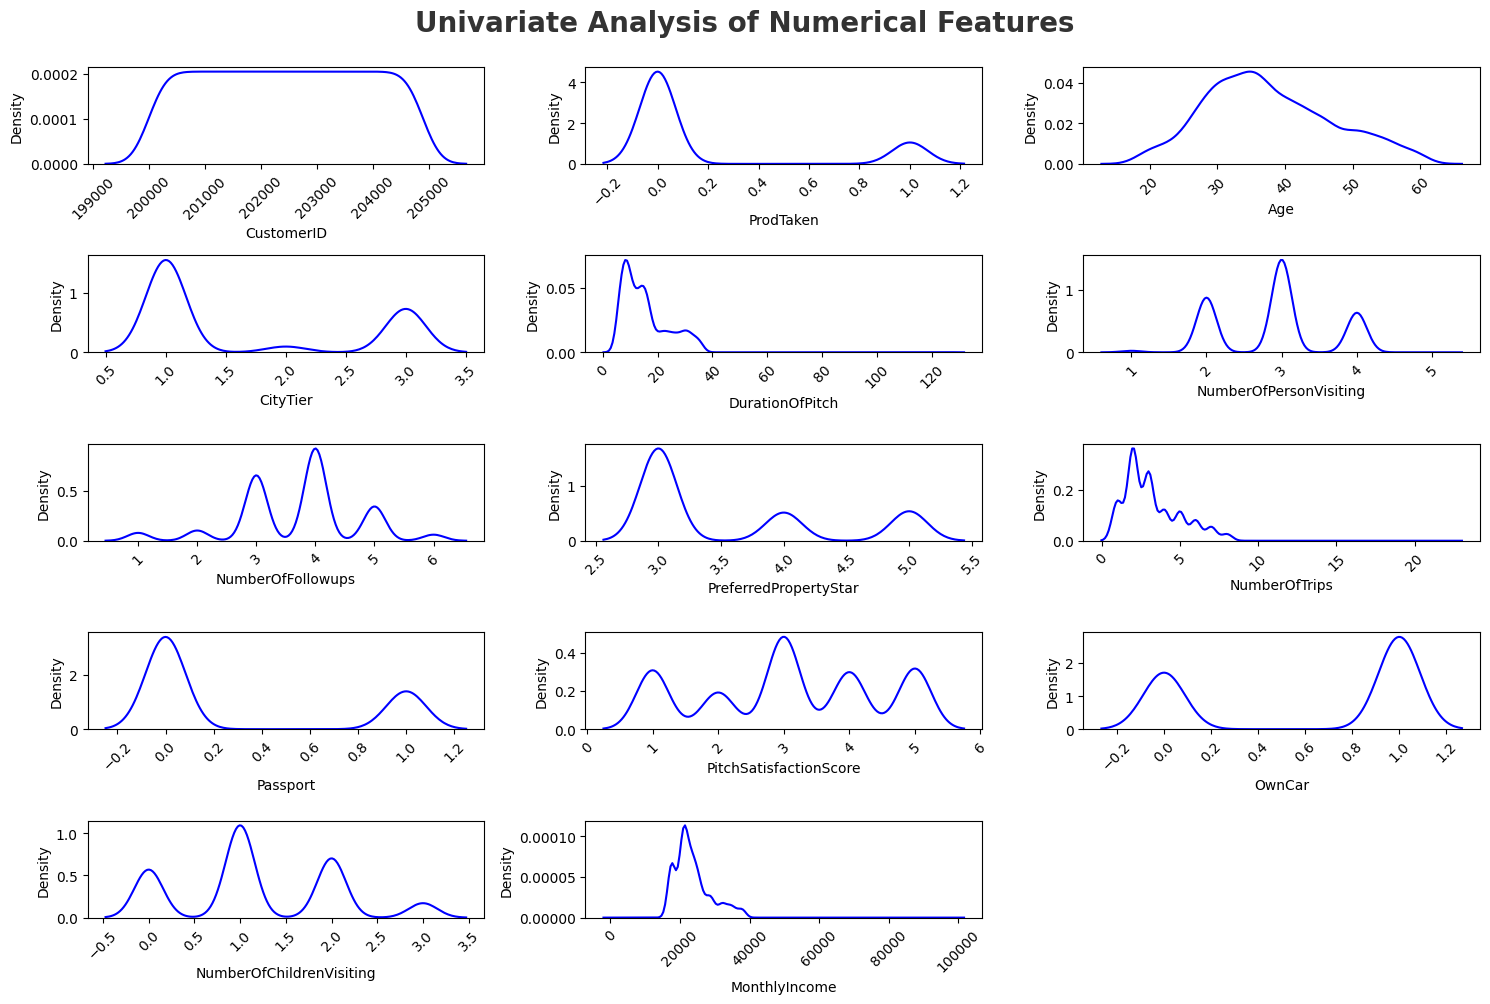

In [24]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Num.png')

* Customer Id is a unique value for each customer.
* Age follows a normal distribution slightly skewed towards right.
* Duration of Pitch is very high for some people


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Changing the datatype of  some categorical feature from int to object

In [39]:
df_types_converted = df.copy()
df_types_converted[['ProdTaken', 'CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore']] = df_types_converted[['ProdTaken', 'CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore']].astype('object')

In [40]:
df_types_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   object 
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   object 
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   object 
 9   NumberOfFollowups         4843 non-null   object 
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   object 
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   object 
 14  Passport

### Categorical Features

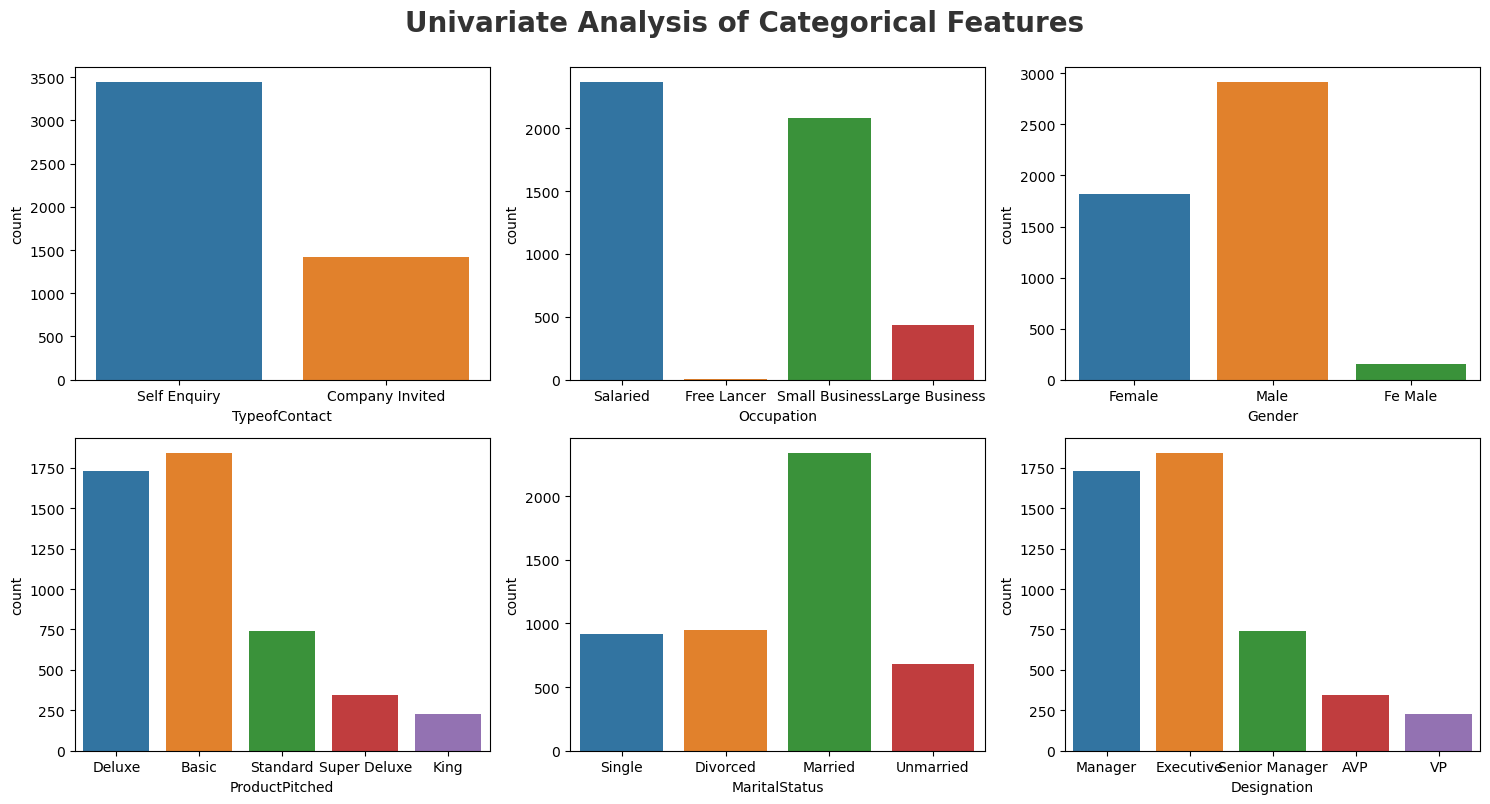

In [23]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
plt.savefig('./images/Univariate_Cat.png')

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [50]:
numeric_features 
type(numeric_features)
numeric_features[1:]

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [52]:
df[(numeric_features[1:])].corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


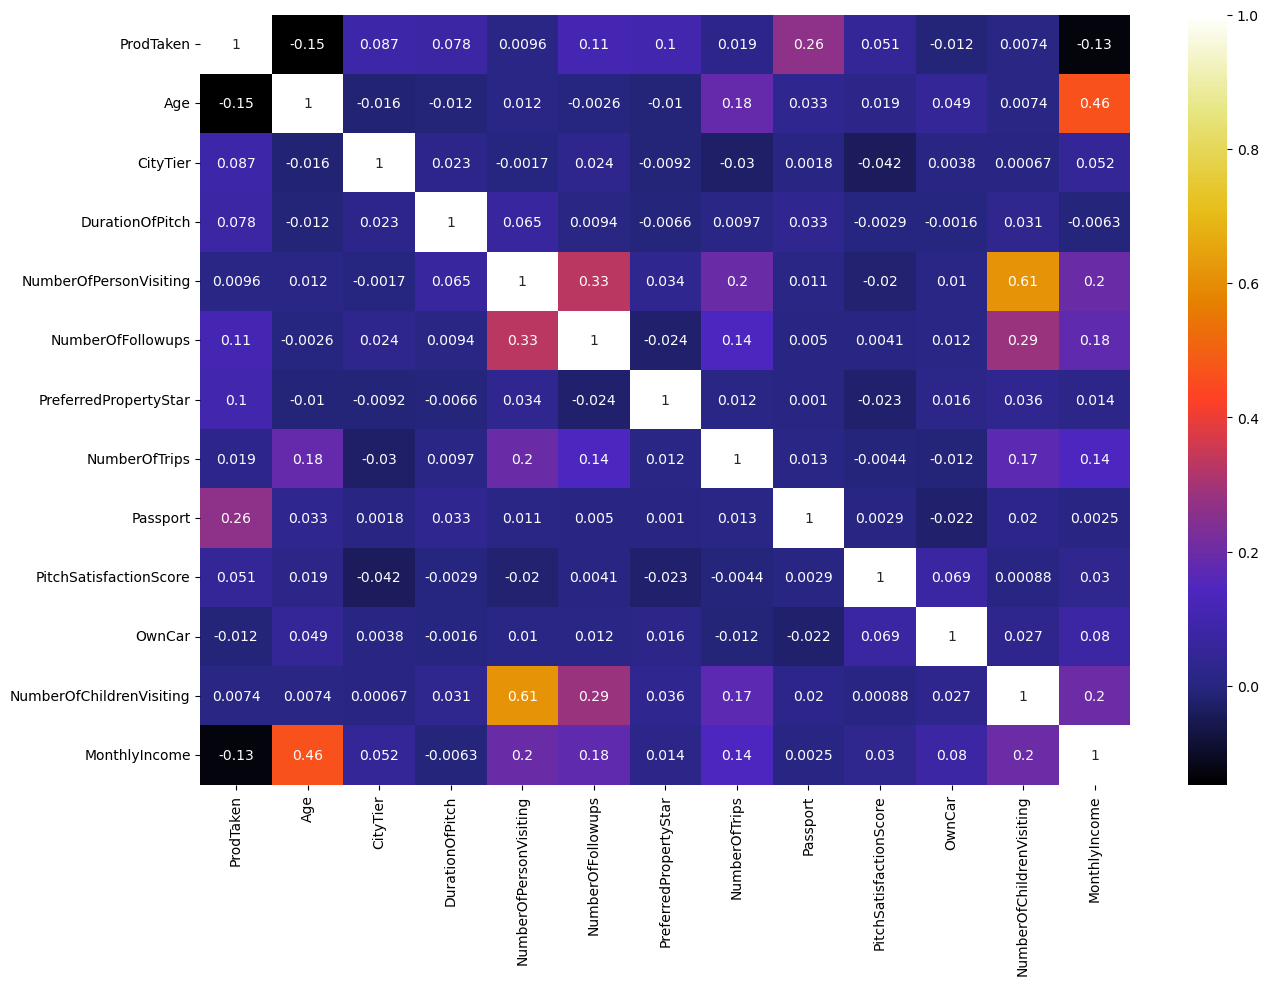

In [55]:
plt.figure(figsize = (15,10))
sns.heatmap(df[(numeric_features[1:])].corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
* Our target column ProdTaken has a weak negative correlation on Age and MontlyIncome.
* The NumberOfFollowups and Passport columns also have a weak positive correlation with ProdTaken.
* The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e ProdTaken**

In [58]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis


**Report** 
* Here Gender Column Fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Imputing Null Values

In [60]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [63]:
df['Age'].unique()

array([41., 49., 37., 33., nan, 32., 59., 30., 38., 36., 35., 31., 34.,
       28., 29., 22., 53., 21., 42., 44., 46., 39., 24., 43., 50., 27.,
       26., 48., 55., 45., 56., 23., 51., 40., 54., 58., 20., 25., 19.,
       57., 52., 47., 18., 60., 61.])

In [64]:
df['Passport'].unique()

array([1, 0])

In [66]:
# Column where unique value is greater than 10 then it continous
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


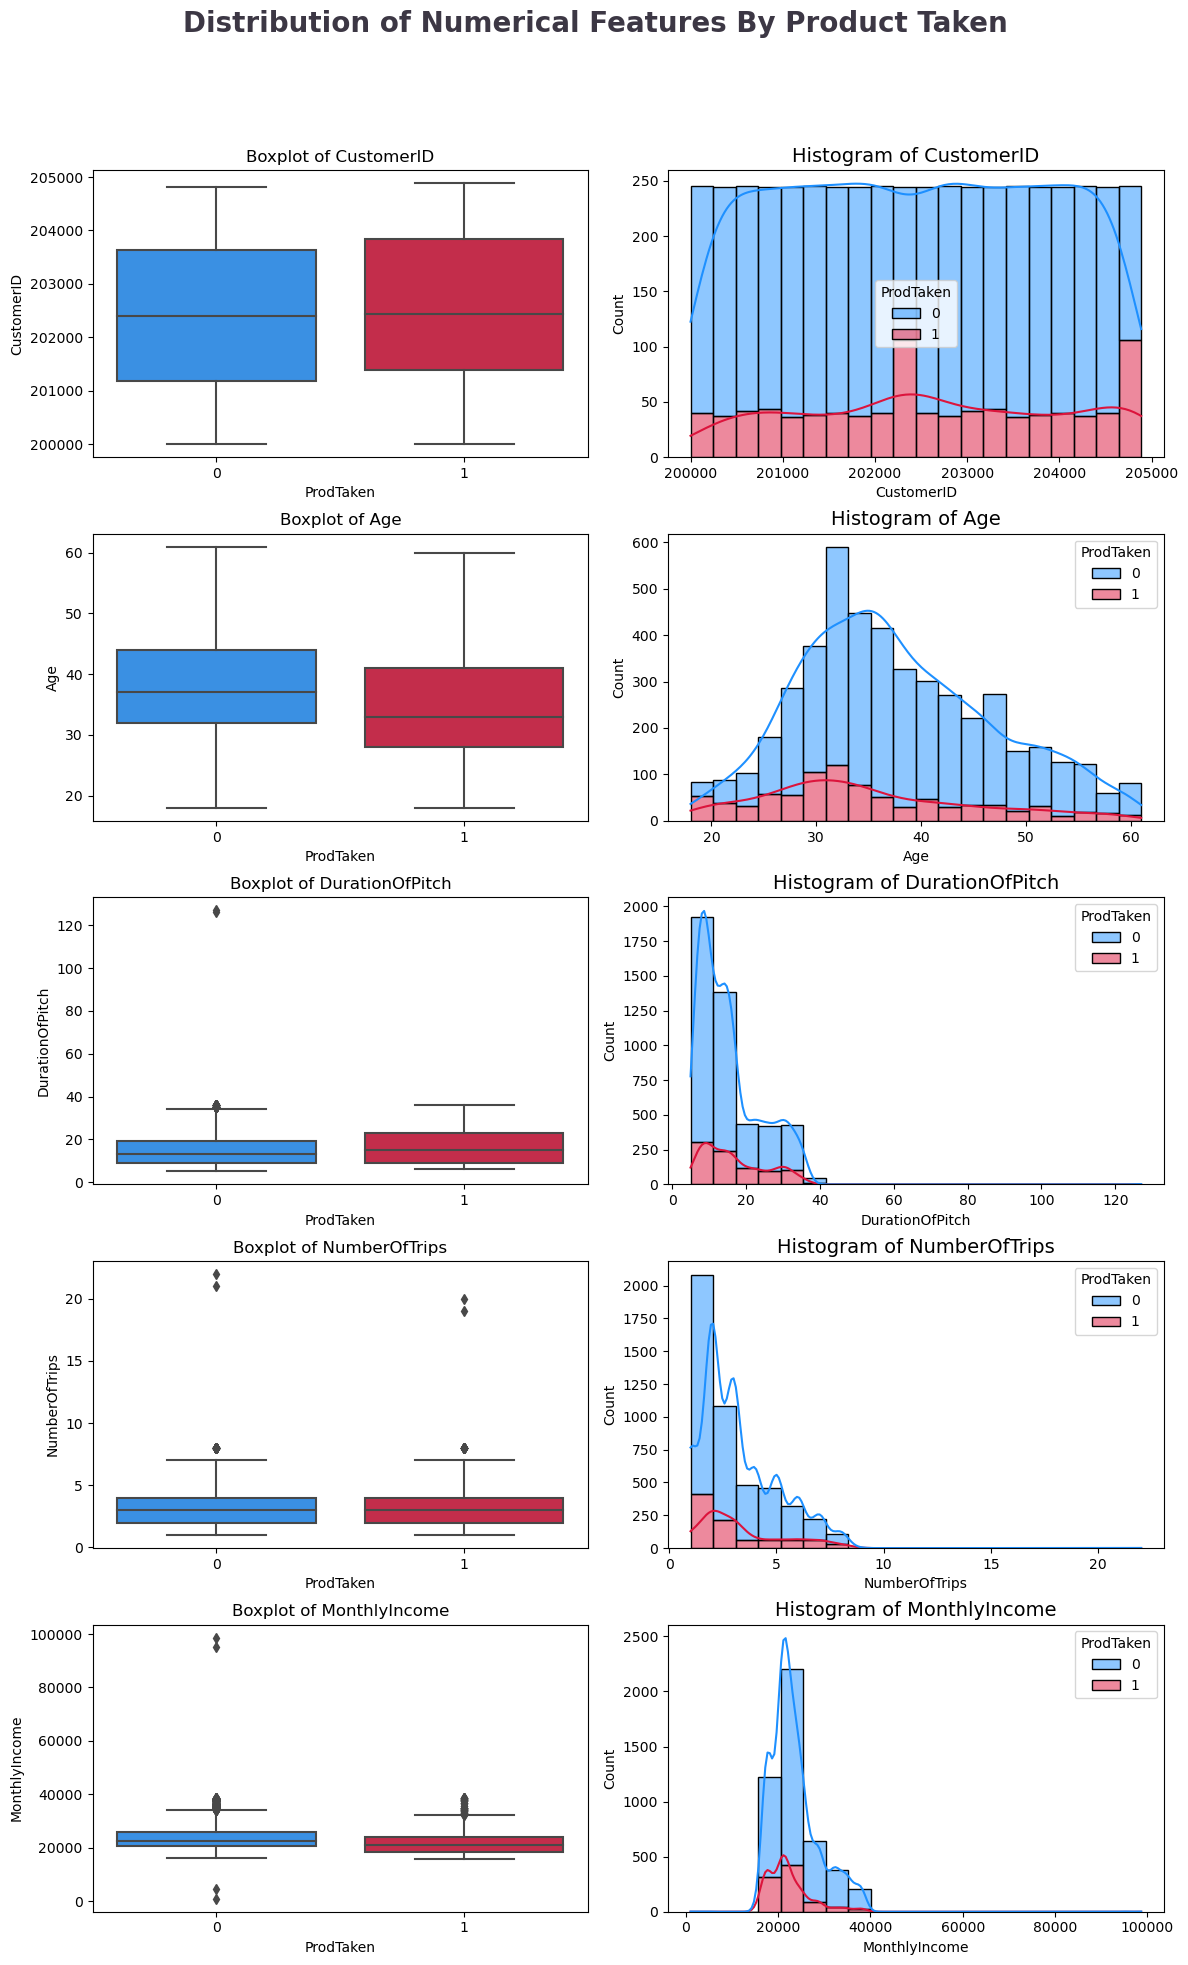

In [68]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(5, 2, figsize=(12,20))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='ProdTaken', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('images/multivariate_num.png')

**Report**
* In the CustomerID column has unique value for each row, it can be ignored as a feature.
* Customers with monthly incomes ranging from 15000-25000 are more likely buying travel packages.
* Pitch duration that sales team do under 20 minutes made more sales.

## Initial Analysis Report

* **There are missing values in the Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact columns.**
* **The CustomerID column can be deleted because each row has unique values.**
* **The ProdTaken column is the target to predict.**
* **In the Categorical column, features can be entered, namely TypeofContact, Occupation, ProductPitched, MaritalStatus, and Designation because based on the results of hypothesis testing using chi-square successfully rejects H0 (meaning it is correlated with the target)**

## 4. Visualization

### 4.1 Visualize the Target Feature

In [70]:
df1 = df.copy()
df1['ProdTaken'] = np.where((df.ProdTaken == 1),'Purchased', 'Not-Purchased' )

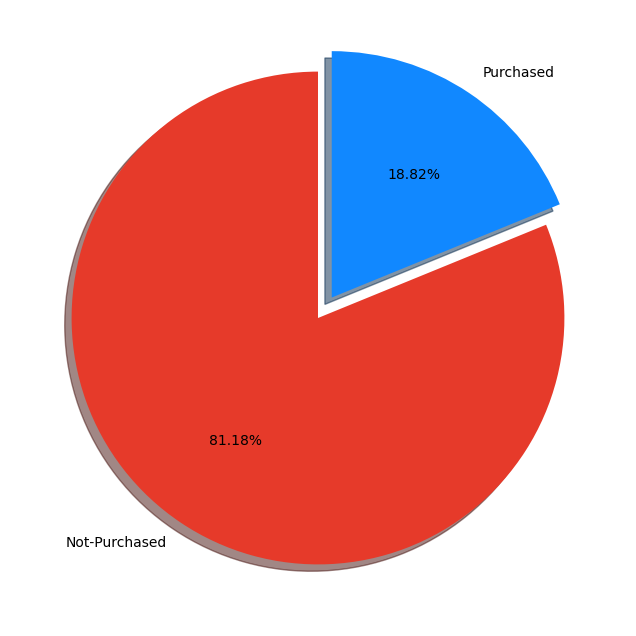

In [72]:
percentage = df1.ProdTaken.value_counts(normalize=True)*100
labels = ["Not-Purchased","Purchased"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#e63a2a', '#1188ff']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is clear that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Not-Purchased value has more count than the Purchased value of the dataset.

### 4.2 Do Men or Women who Purchased more?

In [74]:
df1.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [76]:
df1[df1.ProdTaken == 'Purchased'].Gender.value_counts(normalize=True)

Gender
Male       0.628261
Female     0.344565
Fe Male    0.027174
Name: proportion, dtype: float64

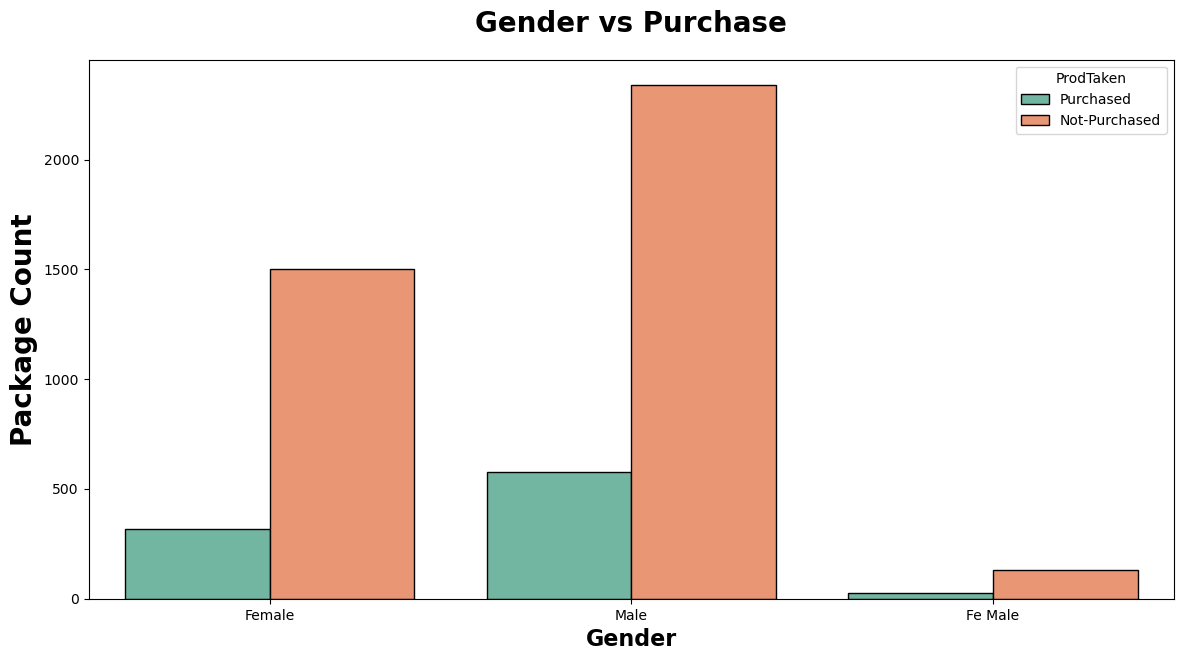

In [78]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Gender",hue="ProdTaken", data=df1,ec = "black",palette="Set2")
plt.title("Gender vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart Male customers Purchased more than Female customers.
* 37% Female customers and 63% Male customers.
* This Feature has impact on the Target Variable.

#### AGE Category Split

In [80]:
bins= [10,20,50,70]
labels = ['Teens','Adult','Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group = df.groupby(['AgeGroup', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCustomer')
age_group

,AgeGroup,ProdTaken,TotalCustomer
0,Teens,0,17
1,Teens,1,29
2,Adult,0,3235
3,Adult,1,746
4,Senior,0,534
5,Senior,1,101


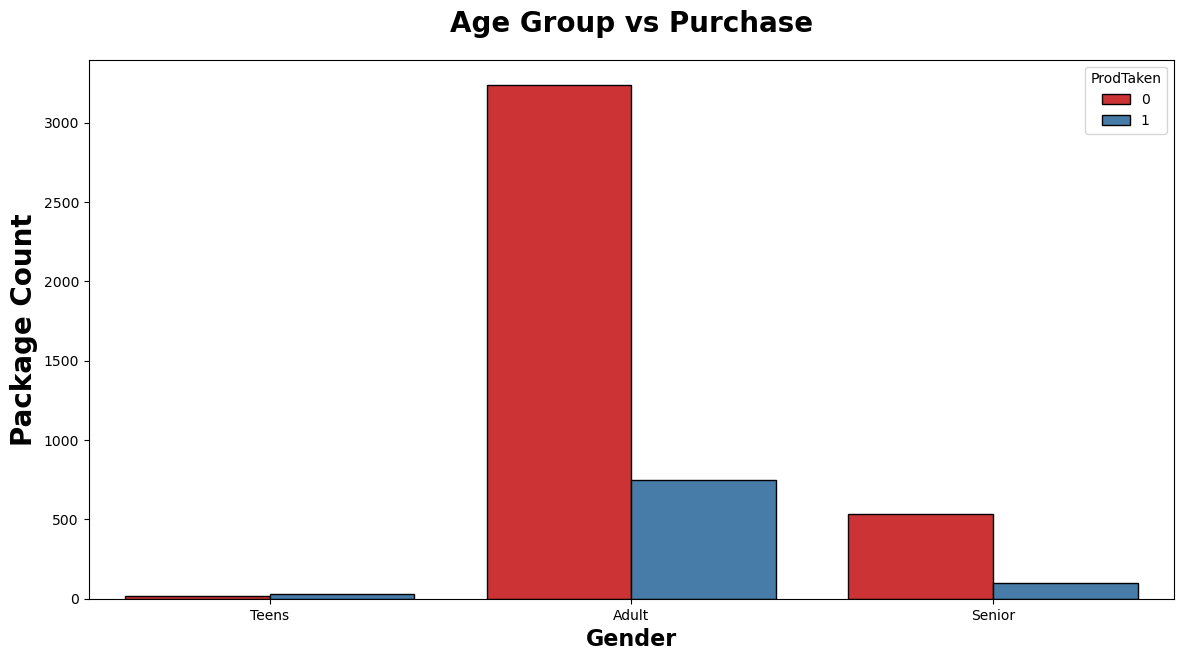

In [83]:
plt.subplots(figsize=(14,7))
sns.countplot(x="AgeGroup",hue="ProdTaken", data=df,ec = "black",palette="Set1")
plt.title("Age Group vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart Adult age Group has the most share of purchase.
* The AgeGroup is 20-50 years old.

### 4.3 Do Maritial Status has any Effect on Purchase of Product

In [86]:
df.groupby('MaritalStatus').ProdTaken.value_counts(normalize=True)

MaritalStatus  ProdTaken
Divorced       0            0.869474
               1            0.130526
Married        0            0.860684
               1            0.139316
Single         0            0.668122
               1            0.331878
Unmarried      0            0.756598
               1            0.243402
Name: proportion, dtype: float64

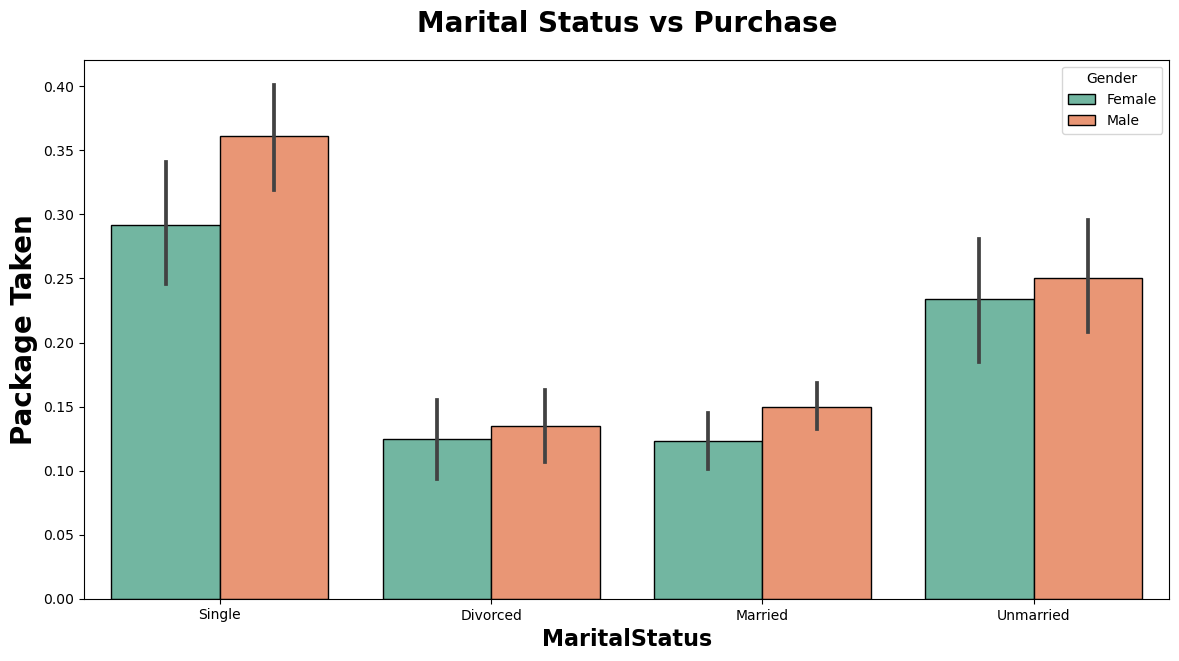

In [88]:
plt.subplots(figsize=(14,7))
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
sns.barplot(x="MaritalStatus", y='ProdTaken',hue="Gender", data=df,ec = "black",palette="Set2")
plt.title("Marital Status vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Taken", weight="bold", fontsize=20)
plt.xlabel("MaritalStatus", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart Male and Female customers who are Single has Purchased more than Divorced and Married and UnMarried.
* 33.18% of Single Customers, 24% of UnMarried Customers
* Followed by approx 13% of Divorced and Married Customers

### 4.4 Duration Of Pitch vs Product Purchase

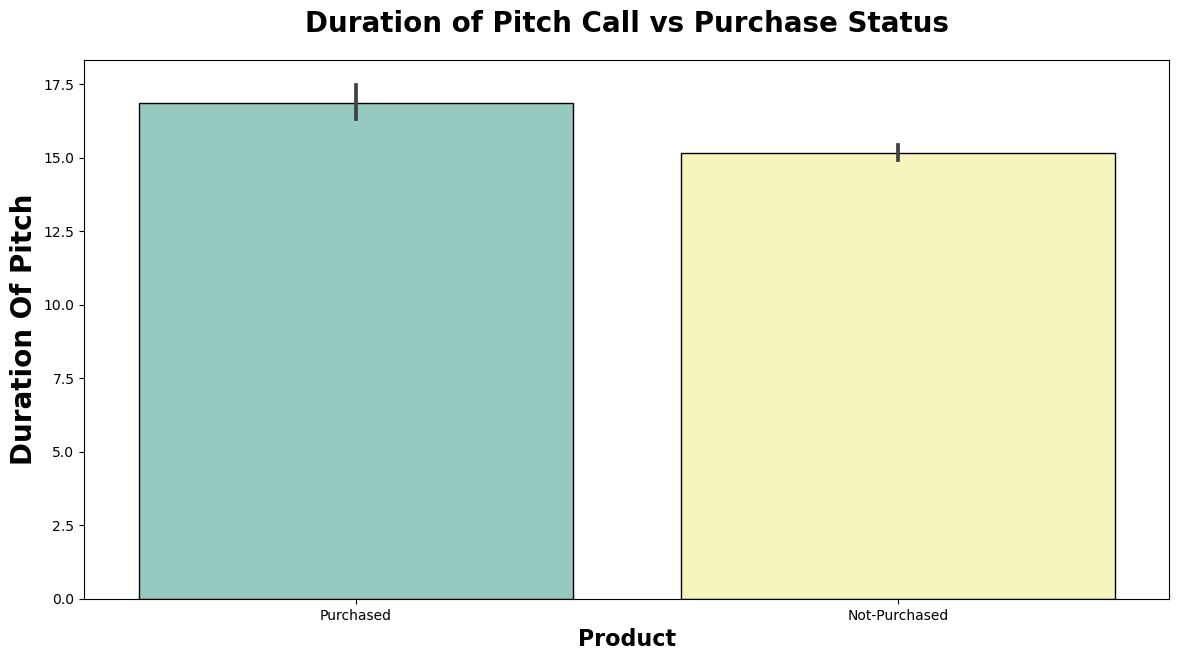

In [90]:
plt.subplots(figsize=(14,7))
sns.barplot(x="ProdTaken", y='DurationOfPitch', data=df1,ec = "black",palette="Set3")
plt.title("Duration of Pitch Call vs Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Duration Of Pitch", weight="bold", fontsize=20)
plt.xlabel("Product", weight="bold", fontsize=16)
plt.show()

In [28]:
pitch_less_10_and_taken = (df.loc[(df['DurationOfPitch']<10) & (df['ProdTaken'] == 1 )]).shape[0]
pitch_less_10_and_not_taken = (df.loc[(df['DurationOfPitch']<10) & (df['ProdTaken'] == 0 )]).shape[0]

pitch_between_10_30_and_taken = df.loc[(df['DurationOfPitch']<30) & (df['ProdTaken'] == 1 ) & (df['DurationOfPitch']>10)].shape[0]
pitch_between_10_30_and_not_taken = df.loc[(df['DurationOfPitch']<30) & (df['ProdTaken'] == 0) & (df['DurationOfPitch']>10)].shape[0]

pitch_more_than_30_and_taken = df.loc[(df['DurationOfPitch']>30) & (df['ProdTaken'] == 1 )].shape[0]
pitch_more_than_30_and_not_taken = df.loc[(df['DurationOfPitch']>30) & (df['ProdTaken'] == 0)].shape[0]


total_package_taken = (df.loc[(df['ProdTaken'] == 1 )]).shape[0]

print(f"Total {pitch_less_10_and_taken + pitch_less_10_and_not_taken} Pitch for less than 10 minutes and {pitch_less_10_and_taken} were bought which is about {pitch_less_10_and_taken/(pitch_less_10_and_taken + pitch_less_10_and_not_taken):.2f}%")
print(f"Total {pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken} Pitch for between 10 and 30 minutes and {pitch_between_10_30_and_taken} were bought which is about {pitch_between_10_30_and_taken/(pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken):.2f}%")
print(f"Total {pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken} Pitch for more than 30 minutes and {pitch_more_than_30_and_taken} were bought which is about {pitch_more_than_30_and_taken/(pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken):.2f}%")

Total 1471 Pitch for less than 10 minutes and 226 were bought which is about 0.15%
Total 2451 Pitch for between 10 and 30 minutes and 488 were bought which is about 0.20%
Total 376 Pitch for more than 30 minutes and 86 were bought which is about 0.23%


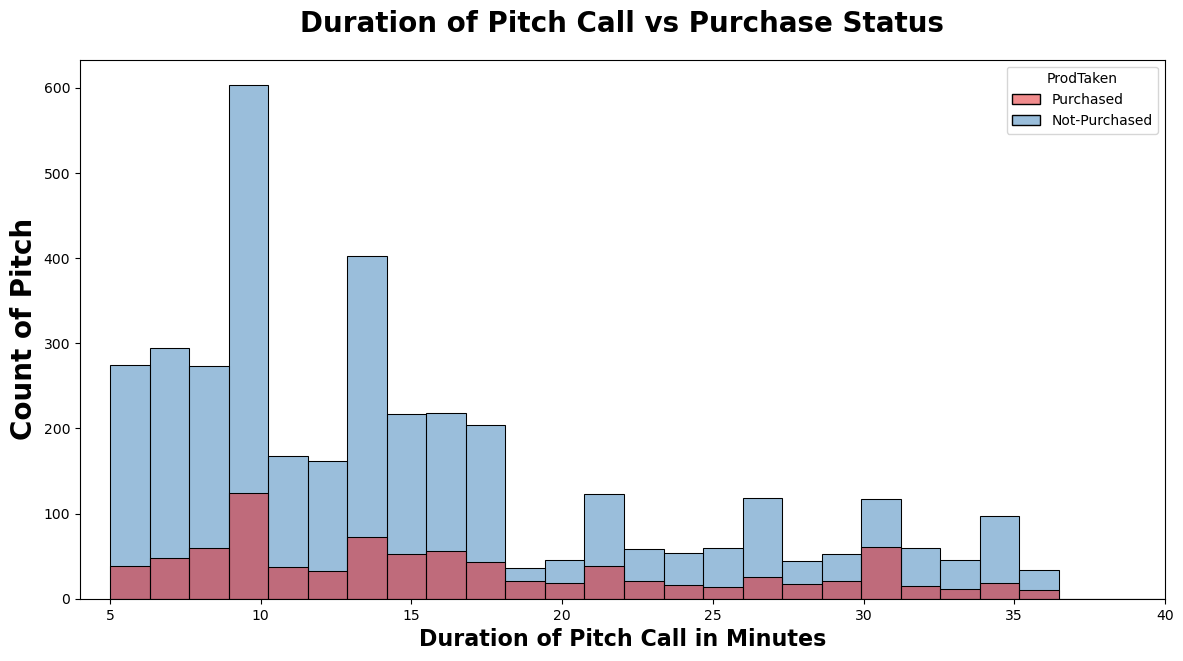

In [94]:
plt.subplots(figsize=(14,7))
sns.histplot(x="DurationOfPitch", data=df1,palette="Set1", hue="ProdTaken")
plt.title("Duration of Pitch Call vs Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count of Pitch", weight="bold", fontsize=20)
plt.xlabel("Duration of Pitch Call in Minutes", weight="bold", fontsize=16)
plt.xlim(4,40)
plt.show()

In [29]:
print(f"Out of total {total_package_taken} packages, \n {pitch_less_10_and_taken/total_package_taken:.2f}% comes from talking less than 10 minutes,\n {pitch_between_10_30_and_taken/total_package_taken:.2f}% comes from talking between 10 minutes and 30 minutes,\n {pitch_more_than_30_and_taken/total_package_taken:.2f}% comes from talking more than 30 minutes")

Out of total 920 packages, 
 0.25% comes from talking less than 10 minutes,
 0.53% comes from talking between 10 minutes and 30 minutes,
 0.09% comes from talking more than 30 minutes


| Package Sold     | Pitch Duration |
| ----------- | ----------- |
| 24%      | Less than 10 Minutes       |
| 57%   | Between 10 Minutes and 30 Minutes        |
| 9%   | Talking More than 30 Minutes        |

**Report:**
* As per the Chart Duration of Pitch has Impact on Target Variable
* 57% Of Package Sold were Pitched between 10 minutes and 30 Minutes 

### 4.5 Number of Person Visiting vs Product Purchase

**NumberOfPersonVisiting:** Total number of persons planning to take the trip with the customer

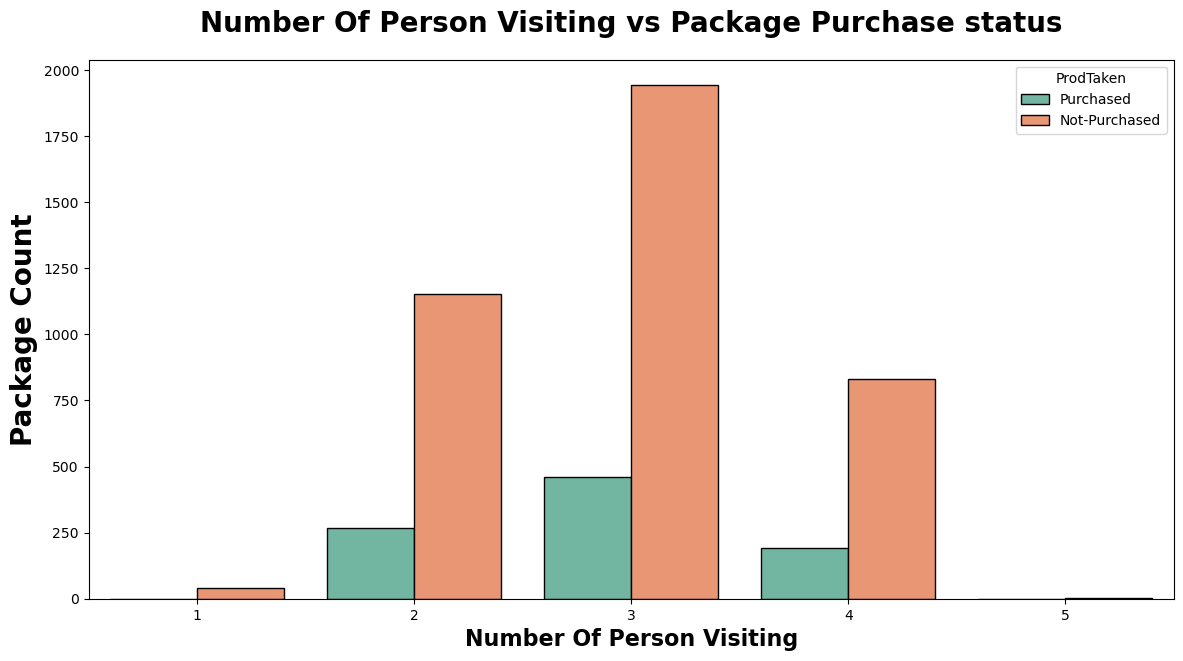

In [99]:
plt.subplots(figsize=(14,7))
sns.countplot(x="NumberOfPersonVisiting",hue="ProdTaken", data= df1,ec = "black",palette="Set2")
plt.title("Number Of Person Visiting vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Number Of Person Visiting", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart Most Purchase were from 3 People. That might be 3 Unmarried Friends or a Family with Couple and a Child.
* Followed by 2 Number of Person.

### 4.6 Number of Sales Followup  vs Product Purchase

**Create df2 which is data of who have purchased**

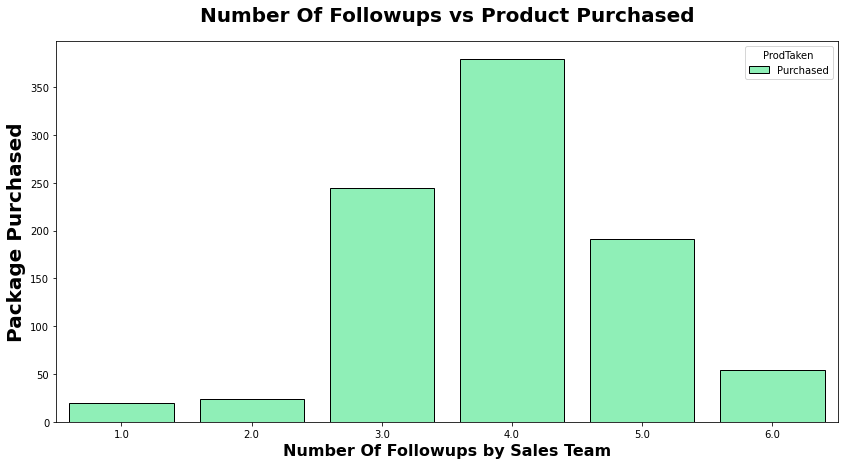

In [31]:
df2 = df1[df1['ProdTaken']== 'Purchased']
plt.subplots(figsize=(14,7))
sns.countplot(x="NumberOfFollowups",hue="ProdTaken", data= df2,ec = "black",palette="rainbow_r")
plt.title("Number Of Followups vs Product Purchased", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Number Of Followups by Sales Team", weight="bold", fontsize=16)
plt.show()

**Report:**
* As per the Chart If Sales team Follows Up like 4 times gets more people Purchasing.

In [32]:
for i in range(1, 7):
    followup_taken = df.loc[(df1['NumberOfFollowups'] == i) & (df1['ProdTaken'] == 'Purchased')].shape[0]
    followup_all= df.loc[(df1['NumberOfFollowups'] == i)].shape[0]

    followup_ratio = followup_taken/followup_all

    print(f"For the follow up {i} Time, total number is {followup_all} and ratio is {followup_ratio:.2f}%")

For the follow up 1 Time, total number is 176 and ratio is 0.11%
For the follow up 2 Time, total number is 229 and ratio is 0.10%
For the follow up 3 Time, total number is 1466 and ratio is 0.17%
For the follow up 4 Time, total number is 2068 and ratio is 0.18%
For the follow up 5 Time, total number is 768 and ratio is 0.25%
For the follow up 6 Time, total number is 136 and ratio is 0.40%


**Report:**
- Very Few inquiries has been followed for 6 times, and they have the highes ratio
- It seem like in the second followups, people confused and had less Purchase.

### 4.7 City Tier vs Purchase Status

In [33]:
df1.groupby('CityTier').ProdTaken.value_counts()

CityTier  ProdTaken    
1         Not-Purchased    2670
          Purchased         520
2         Not-Purchased     152
          Purchased          46
3         Not-Purchased    1146
          Purchased         354
Name: ProdTaken, dtype: int64

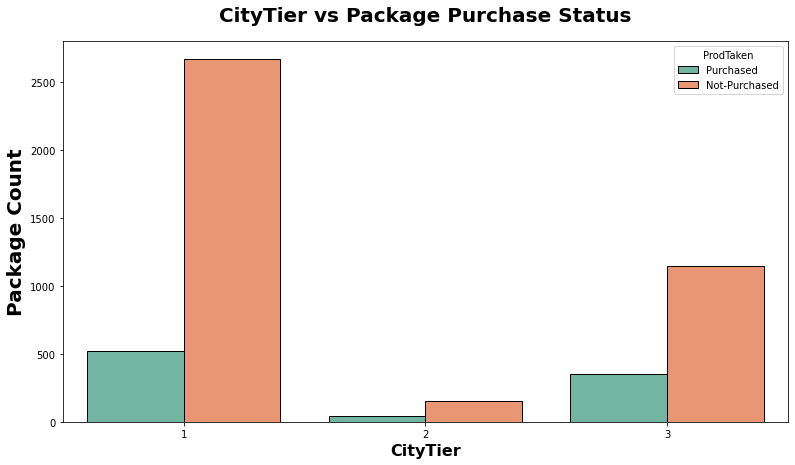

In [34]:
plt.subplots(figsize=(13,7))
sns.countplot(x="CityTier",hue="ProdTaken", data= df1,ec = "black",palette="Set2")
plt.title("CityTier vs Package Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("CityTier", weight="bold", fontsize=16)
plt.show()

**Report:**
- Many customers are from City tier 1 compared to other tier.
- City Tier has very good impact on target variable.

### 4.7 Occupation vs Product Purchase

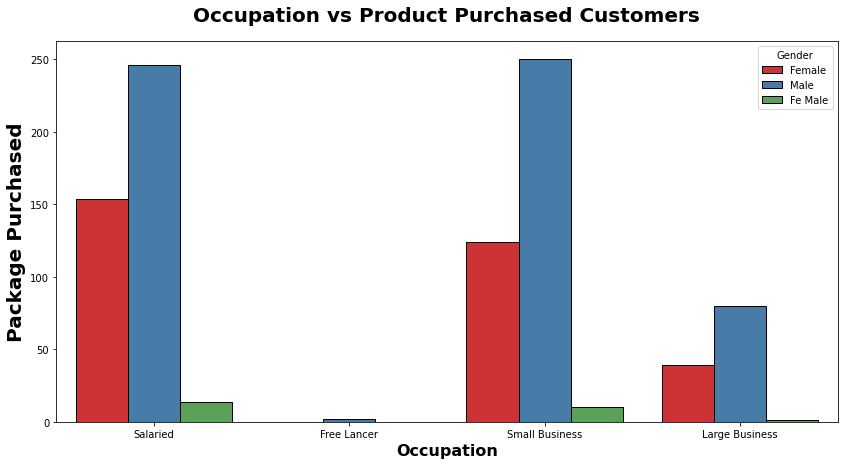

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Occupation",hue="Gender", data= df2,ec = "black",palette="Set1")
plt.title("Occupation vs Product Purchased Customers", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Occupation", weight="bold", fontsize=16)
plt.show()

**Report:**
* As Per Chart we can see Business Males have purchased more than Salaried Male.
* We can also see Salaried Females has purchased more than the Small Business  Females.
* Followed by Large Business and Freelancing

### 4.8 Product Pitched and Product's Status

**Products Pitched and Products sold**

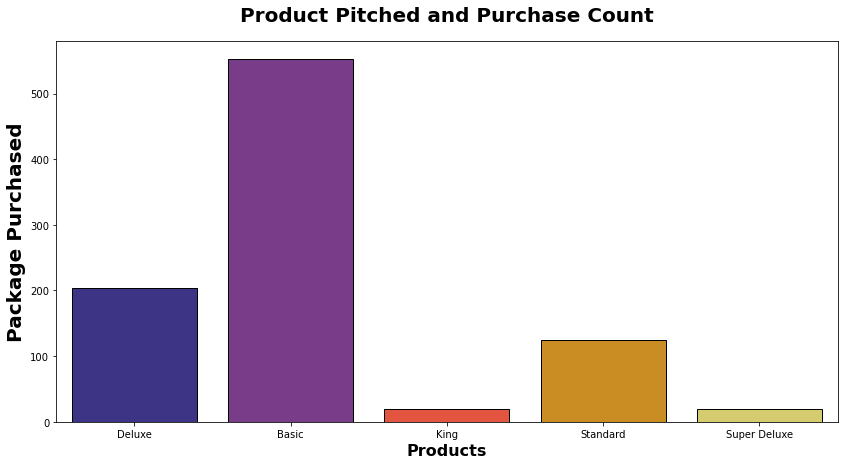

In [36]:
plt.subplots(figsize=(14,7))
sns.countplot(x="ProductPitched", data= df2,ec = "black",palette="CMRmap")
plt.title("Product Pitched and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Products", weight="bold", fontsize=16)
plt.show()

**Report:**
* Basic Package was the most preferred package by customers
* Deluxe is Second more Purchased Package

**Products Pitched and Not Purchased**

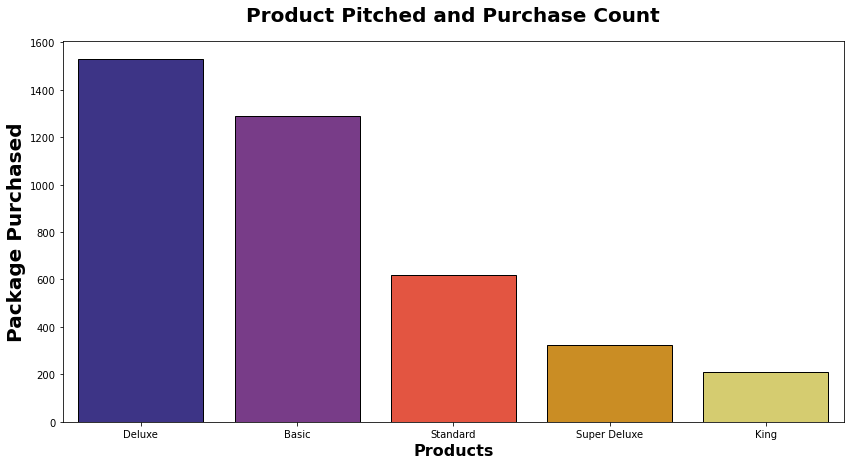

In [37]:
df3 = df1[df1['ProdTaken']=='Not-Purchased']
plt.subplots(figsize=(14,7))
sns.countplot(x="ProductPitched", data= df3,ec = "black",palette="CMRmap")
plt.title("Product Pitched and Purchase Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Products", weight="bold", fontsize=16)
plt.show()

**Report:**
* Deluxe Package was the most Pitched package by Sales Yet People didnt buy it.
* Reducing the cost of Deluxe Package might help in getting sucessfull sales pitch.

### 4.9 Preferred Property Star vs Product Purchase

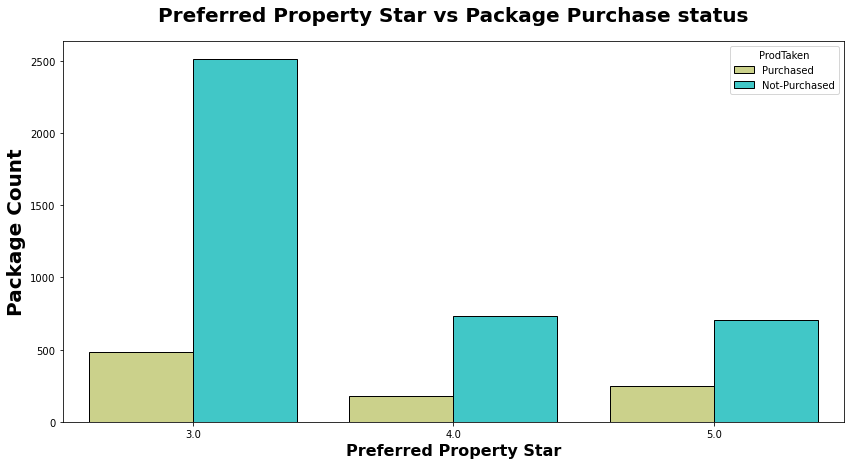

In [38]:
plt.subplots(figsize=(14,7))
sns.countplot(x="PreferredPropertyStar",hue="ProdTaken", data= df1,ec = "black",palette="rainbow_r")
plt.title("Preferred Property Star vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Preferred Property Star", weight="bold", fontsize=16)
plt.show()

**Report**:
- People Perfered More 3 Star Hotels Followed by 5 Stars and 4 Stars

### 4.10 Passport vs Package Purchase

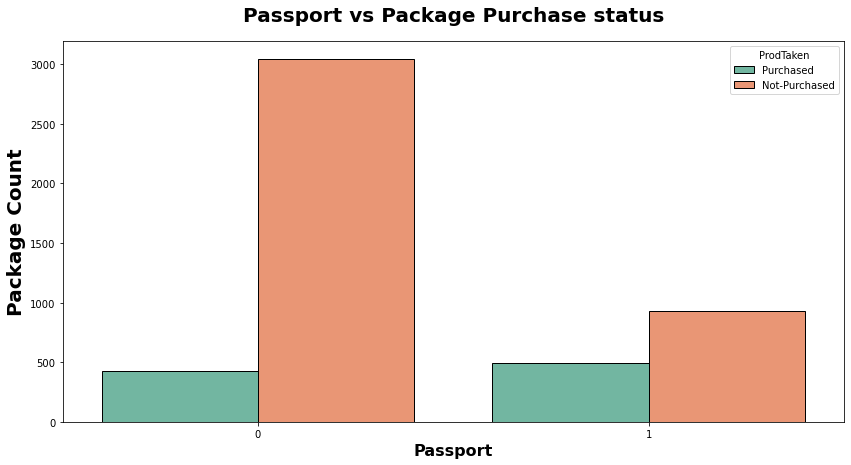

In [39]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Passport",hue="ProdTaken", data= df1,ec = "black",palette="Set2")
plt.title("Passport vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Passport", weight="bold", fontsize=16)
plt.show()

**Report**:
- People Most people who had Passport had purchased the package.
- Poeple with No passport mostly didn't Purchase the package.

(0.0, 10.0)

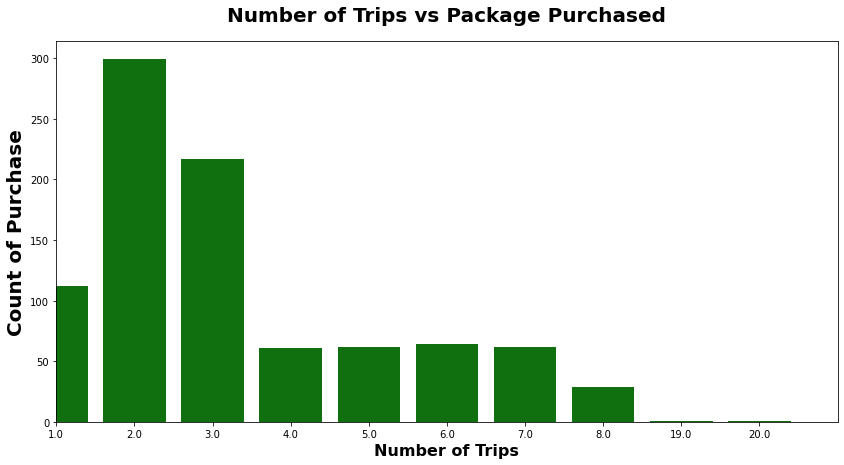

In [40]:
# Plot Line Chart
plt.figure(figsize=(14,7))
sns.countplot(x = df2.NumberOfTrips, color='g')
plt.title("Number of Trips vs Package Purchased", weight = "bold",fontsize=20, pad=20)
plt.xlabel("Number of Trips",weight="bold", fontsize=16)
plt.ylabel("Count of Purchase",weight="bold", fontsize=20)
plt.xlim(0,10)

**Report**:
- People with 2 Trips had more purchase.
- People with more than 8 Trips make no purchase.

## 4.11 Own car vs Products Purchase

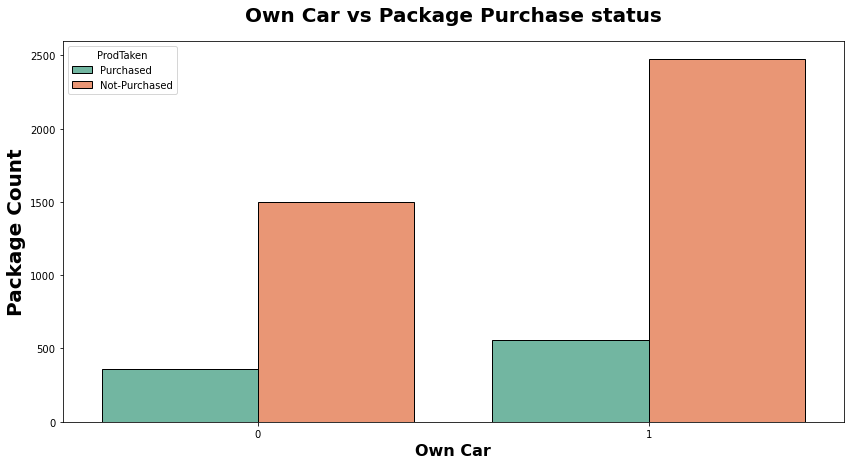

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="OwnCar",hue="ProdTaken", data= df1,ec = "black",palette="Set2")
plt.title("Own Car vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Own Car", weight="bold", fontsize=16)
plt.show()

**Report**:
- People with Car has puchased the package more, also show their income is in higher category.

### 4.12 Number of Children visit vs Package purchase

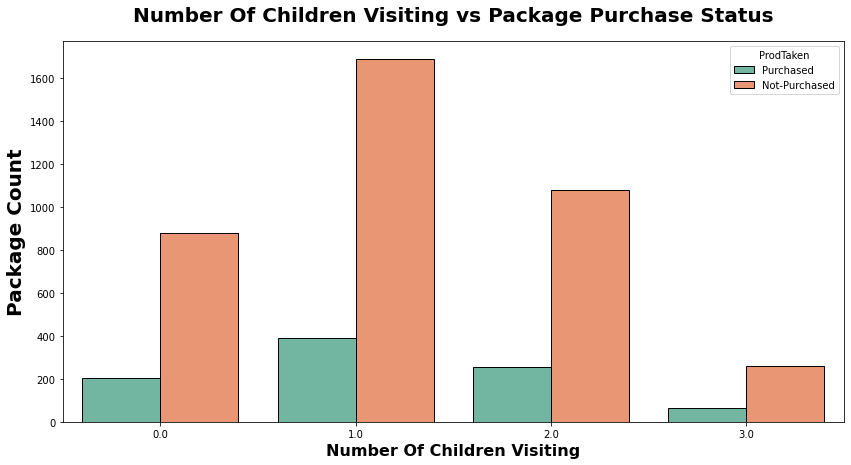

In [42]:
plt.subplots(figsize=(14,7))
sns.countplot(x="NumberOfChildrenVisiting",hue="ProdTaken", data= df1,ec = "black",palette="Set2")
plt.title("Number Of Children Visiting vs Package Purchase Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Number Of Children Visiting", weight="bold", fontsize=16)
plt.show()

**Report**:
- People with 1 Children has puchased the package more, Just like what we saw in Number of person visiting it was 3 people package which was sold more, it will be Married Couple with 1 child.

### 4.13 Designation vs Package Purchased

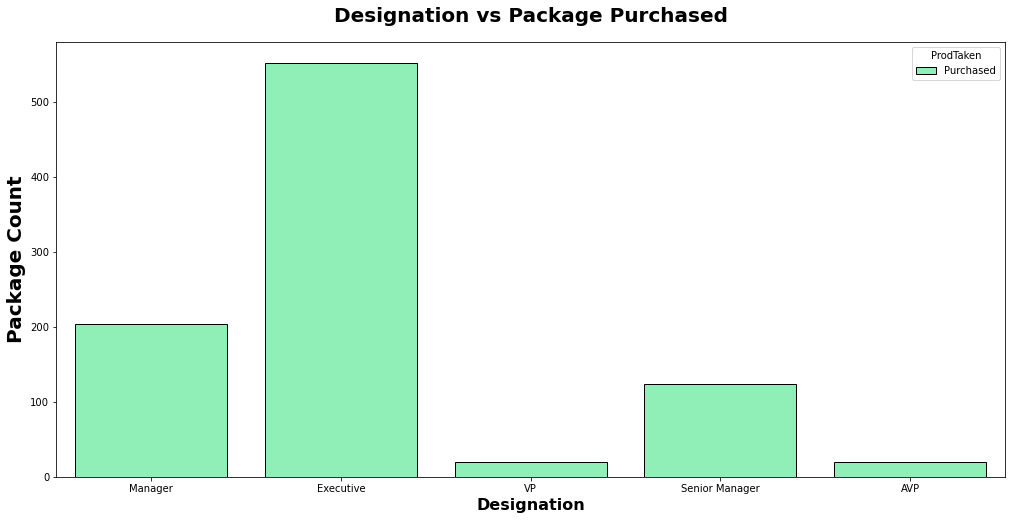

In [43]:
plt.subplots(figsize=(17,8))
sns.countplot(x="Designation",hue="ProdTaken", data= df2,ec = "black",palette="rainbow_r")
plt.title("Designation vs Package Purchased", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Designation", weight="bold", fontsize=16)
plt.show()

**Report**
* Executives have purchased the Product more than other designation people.
* This feature has very good impact on target variable.

## Final Report

* The Column names and Data types are correct, but there are Spelling errors in the Gender column.
* The `ProdTaken` column is the target to predict.
* There are outliers in the `DurationOfPitch, NumberOfTrips, MonthlyIncome` columns.
* The `NumberOfPersonVisiting and NumberOfChildrenVisiting` columns have a positive correlation they can be combined to form a new feature
* Follow Ups on sales pitch more than 3 times has given good results.
* Numeric fields that appear to have a correlation to the target can be used as features, namely `Age`, `MontlyIncome`, `NumberOfFollowups` and `Passport`.
* Sales Pitch for 5 to 20 minutes is a very good range.
* Some numeric columns that appear completely uncorrelated to the target can be deleted.